In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc("figure",dpi=150)
mpl.rc("figure",figsize=(3,2))

In [2]:
data = pd.read_csv("frequency_vs_velocity.dat", sep = "\t", index_col = 0)
data.head()

,v_up,v_up_error,v_dw,v_dw_error
frequencies,,,,
0.0,-0.000067,0.000070,0.000322,0.000060
1.0,-0.000428,0.000117,-0.000700,0.000216
2.0,-0.000328,0.000116,-0.000298,0.000121
3.0,0.000074,0.000150,-0.000499,0.000175
4.0,0.009853,0.000101,0.000901,0.000187


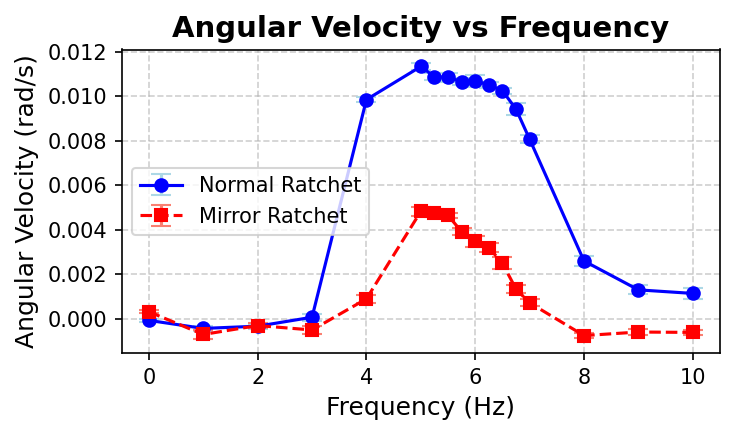

In [3]:
# Tus datos

dir3 = r"/home/hapless/Documents/Projects/week8/files_50M/"
dir4 = r"/home/hapless/Documents/Projects/week8/files_50M_mirror/"

frequencies = data.index.values

velocity_per_freq_normal = data.v_up
error_per_freq_normal =  data.v_up_error

velocity_per_freq_mirror =  data.v_dw
error_per_freq_mirror =  data.v_dw_error

# Crear una sola figura con un solo eje
plt.figure(figsize=(5, 3))

# Graficar ambos conjuntos de datos en el mismo eje
plt.errorbar(
    frequencies,
    velocity_per_freq_normal,
    yerr=error_per_freq_normal,
    fmt='o-',  # Marcadores circulares con línea continua
    color='blue',
    ecolor='lightblue',  # Color de las barras de error
    capsize=5,     # Tamaño de las líneas horizontales en las barras de error
    label='Normal Ratchet'
)

plt.errorbar(
    frequencies,
    velocity_per_freq_mirror,
    yerr=error_per_freq_mirror,
    fmt='s--',  # Marcadores cuadrados con línea discontinua
    color='red',
    ecolor='salmon',
    capsize=5,
    label='Mirror Ratchet'
)

# Configuración del gráfico
plt.title('Angular Velocity vs Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Angular Velocity (rad/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Ajustar diseño y mostrar figura
plt.tight_layout()
plt.show()
